In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
from matplotlib import style
import os 
os.chdir(os.path.dirname(os.getcwd()))
import pandas as pd
import pickle as pkl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
style.use('ggplot')
%matplotlib inline
import numpy as np
import seaborn as sns

In [102]:
data = pkl.load(open('data/output/BaseProblem/Multi_Zeta0.3_eval.pkl', "rb"))

In [103]:
data['Total Load'] = data['Total Load']*1000
data['Base Loads 1'] = data['Base Loads 1']*1000
data['Base Loads 2'] = data['Base Loads 2']*1000
data['Base Loads'] = data['Base Loads 1'] + data['Base Loads 2']
data['Excess Load'] = data['Total Load']-5
data['Above'] = (data['Total Load'] >= 5)*(data['Total Load']-5)
data['Date'] = pd.date_range(start='2014-11-01',end='2014-12-31-23:00:00', periods=len(data))
data['Day'] = data['Date'].dt.day
data['Daily Excess'] = data.groupby('Day')['Above'].sum()

In [104]:
data['Daily Excess']

0           NaN
1      5.626045
2      6.687588
3      4.382331
4      4.249831
         ...   
740         NaN
741         NaN
742         NaN
743         NaN
744         NaN
Name: Daily Excess, Length: 745, dtype: float64

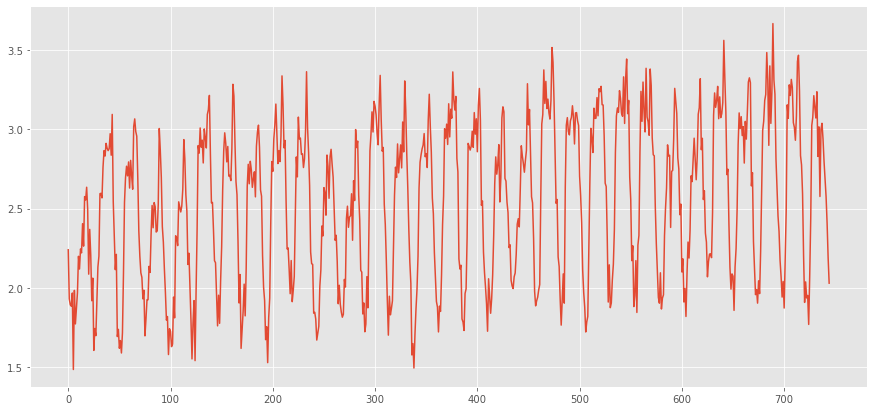

In [25]:
f, ax = plt.subplots(figsize=(15,7))
data['Base Loads'].plot()

In [105]:
data['above'] = (data['Total Load'] >= 5)*(data['Total Load']-5)

In [106]:
sum(data['above'])

324.1563660206969

In [107]:
data['above'].mean()

0.43510921613516323

In [108]:
data['Rewards'].sum()

-1192.1052988884499

In [109]:
PRICE_SET = [10,20,30,40,50,60]
def extract_price(x):
    return PRICE_SET[int(x)]
data['Chosen Price'] = data['Actions'].map(lambda x: extract_price(x))

In [110]:
data_base = pkl.load(open('data/output/BaseProblem/Multi_Zeta0.3base_eval.pkl', "rb"))

In [111]:
data_base['Total Load'] = data_base['Total Load']*1000
data_base['Base Loads 1'] = data_base['Base Loads 1']*1000
data_base['Base Loads 2'] = data_base['Base Loads 2']*1000
data_base['Base Loads'] = data_base['Base Loads 1'] + data_base['Base Loads 2']
data_base['Above'] = (data_base['Total Load'] >= 5)*(data_base['Total Load']-5)
data_base['Excess Load'] = data_base['Total Load']-5
data_base['Date'] = pd.date_range(start='2014-11-01',end='2014-12-31-23:00:00', periods=len(data))
data_base['Day'] = data['Date'].dt.day
data_base['Daily Excess'] = data_base.groupby('Day')['Above'].sum()

In [112]:
one_week = data.iloc[:,:]

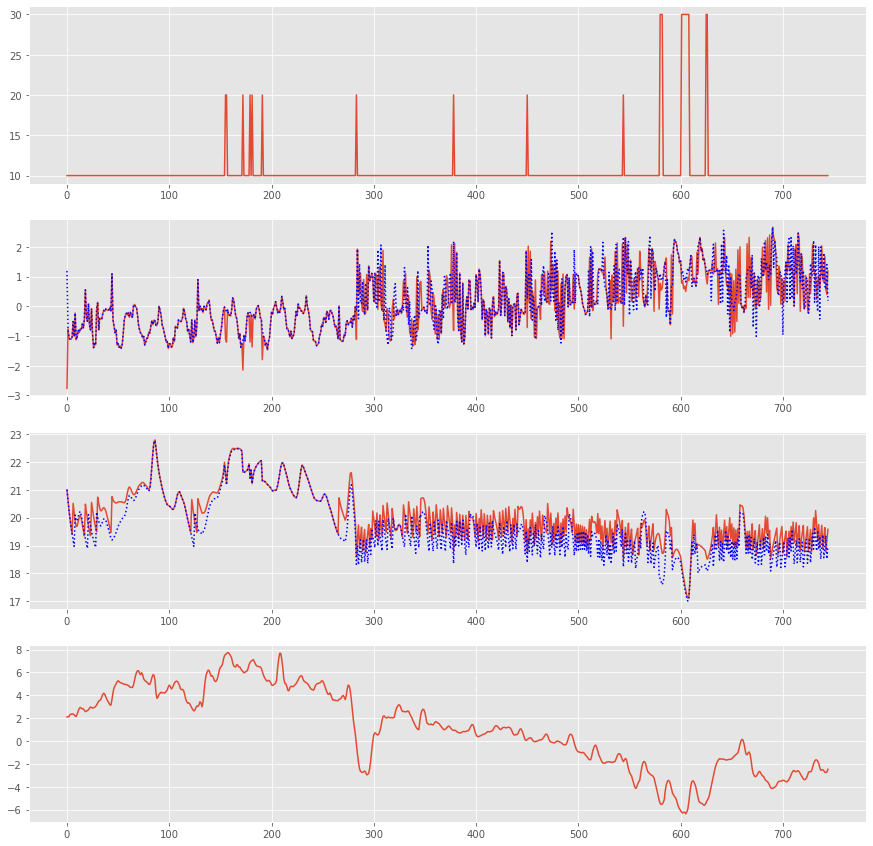

In [113]:
f, ax = plt.subplots(4,1,figsize=(15,15))
one_week['Chosen Price'].plot(ax=ax[0])
one_week['Excess Load'].plot(ax=ax[1])
one_week['Double Base'] = one_week['Base Loads']*2
#one_week['Base Loads'].plot(ax=ax[1],c='g')
data_base.iloc[:,:]['Excess Load'].plot(ax=ax[1],c='b', linestyle = 'dotted')
one_week['Inside Temperatures 1'].plot(ax=ax[2])
one_week['Inside Temperatures 2'].plot(ax=ax[2], c='b', linestyle = 'dotted')
one_week['Ambient Temperatures'].plot(ax=ax[3])

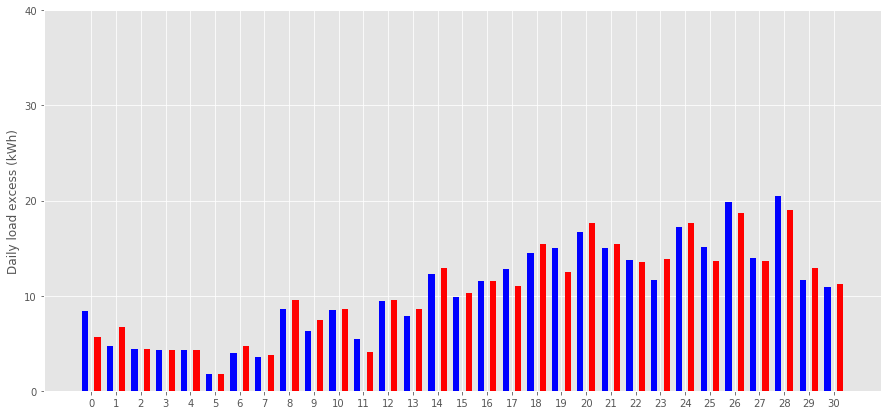

In [114]:
N=len(data_base.dropna())
ind = np.arange(N)
f, axs = plt.subplots(1,figsize=(15,7), sharey=False)
axs.bar(ind - 0.25, data_base['Daily Excess'].dropna(), color = 'b', width = 0.25, label = 'Base with static price')
axs.bar(ind + 0.25, data['Daily Excess'].dropna(), color = 'r', width = 0.25, label = 'Dynamic prices with RL')
axs.set_ylabel('Daily load excess (kWh)')
axs.set_yticks(np.arange(0, 50, 10))
#for i, v in enumerate(cost_labels_values):
#    axs[0].text(i-0.15, 
#              v+0.2, 
#              v, 
#              fontsize=12)
axs.set_xticks(ind)
#axs.set_xticklabels(labels)

In [36]:
sum(data['Total Load'] >= 5)

347

In [37]:
data_base['Rewards'].sum()

-2658.699720810283

In [38]:
sum(data_base['Above'])

495.4429260533392

In [28]:
data_base['above'].mean()

1.545624445117325

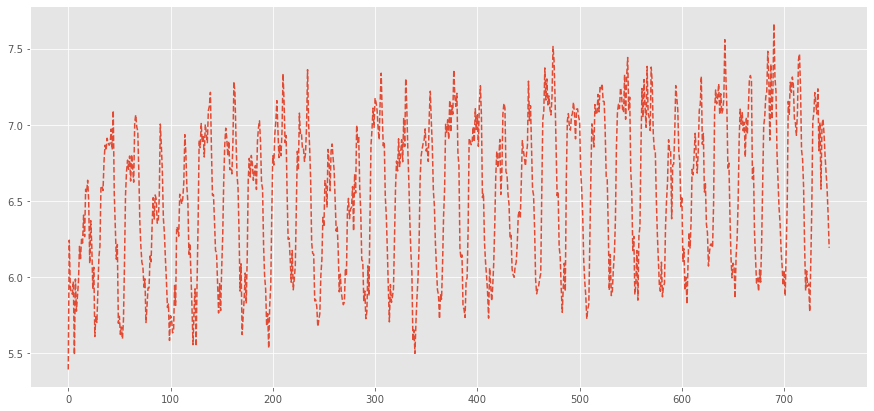

In [29]:
f, ax = plt.subplots(figsize=(15,7))
data_base['Total Load'].plot(ax=ax, linestyle='--')

In [30]:
sum(data_base['Total Load'] >= 5)

745

In [115]:
data = pkl.load(open('data/output/RLBuildings/Lowerload/9792641_dynamic_True_rewards_dqn.pkl', "rb"))

In [116]:
data[-1]

{'NUM_EPISODES': 1500,
 'EPSILON': 1,
 'EPS_DECAY': 0.99997,
 'LEARNING_RATE_': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 3600,
 'NUM_HOURS': 744,
 'COMFORT_PENALTY': 10,
 'LOAD_PENALTY': 1000,
 'PRICE_SENSITIVITY': 200,
 'ZETA': 0}

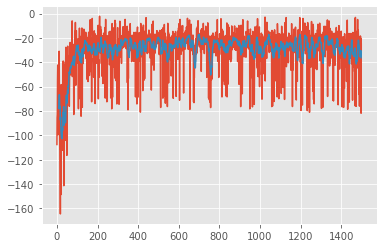

In [117]:
plt.figure()
plt.plot(data[:-1])
rewards_df = pd.DataFrame()
rewards_df['reward'] = data[:-1]
moving_avg = rewards_df[:-1].rolling(window=10).mean()
plt.plot(moving_avg)

In [18]:
data_rms = pkl.load(open('data/output/8667145_dynamic_True_rewards_dqn.pkl', "rb"))

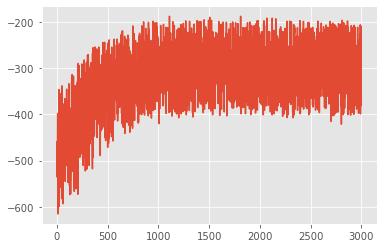

In [19]:
plt.figure()
plt.plot(data_rms[:-1])

# Buildings with RL agents

In [123]:
data = pkl.load(open('data/output/RLBuildings/ScaledUp/0227160_dynamic_True_rewards_dqn.pkl', "rb"))

In [124]:
data[-1]

{'NUM_EPISODES': 4000,
 'EPSILON': 1,
 'EPS_DECAY': 0.99997,
 'LEARNING_RATE_': 0.001,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 64,
 'TIME_STEP_SIZE': 3600,
 'NUM_HOURS': 744,
 'COMFORT_PENALTY': 1,
 'LOAD_PENALTY': 100,
 'PRICE_SENSITIVITY': 200,
 'ZETA': 0.1}

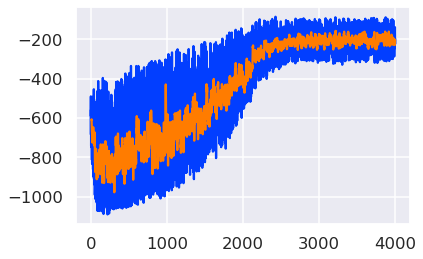

In [125]:
plt.figure()
plt.plot(data[:-1])
rewards_df = pd.DataFrame()
rewards_df['reward'] = data[:-1]
moving_avg = rewards_df[:-1].rolling(window=10).mean()
plt.plot(moving_avg)

# Evaluation on January

In [2]:
data = pkl.load(open("data/output/RLBuildings/Lowerload/Multi_RL_jan_Zeta0.1_base_30_eval.pkl", "rb"))

data['Total Load'] = data['Total Load']*1000
data['Base Loads 1'] = data['Base Loads 1']*1000
data['Base Loads 2'] = data['Base Loads 2']*1000
data['Base Loads'] = data['Base Loads 1'] + data['Base Loads 2']
data['Deviation from load limit'] = data['Total Load'] - 4
data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01-00:00:00', periods=len(data))
data['Day'] = data['Date'].dt.day
data.index = data['Date']

In [3]:
data['Above'] = (data['Total Load'] >= 4)*(data['Total Load']-4)
sum(data['Above'])

869.6436189271923

In [4]:
data

,Inside Temperatures 1,Inside Temperatures 2,Base Loads 1,Base Loads 2,Actions 1,Actions 2,Ambient Temperatures,Actions,Rewards,Total Load,Base Loads,Deviation from load limit,Date,Day,Above
Date,,,,,,,,,,,,,,,
2014-01-01 00:00:00,21.000000,21.000000,1.125480,1.115002,0.000000,0.000000,2.118,0.0,0.000000,2.240482,2.240482,-1.759518,2014-01-01 00:00:00,1,-0.000000
2014-01-01 01:00:00,21.604584,20.301569,1.003822,0.927929,0.879607,0.387473,2.118,0.0,-0.701952,4.774642,1.931751,0.774642,2014-01-01 01:00:00,1,0.774642
2014-01-01 02:00:00,21.434646,19.913022,1.003643,0.890625,0.606543,0.479115,2.147,0.0,-0.096863,4.103067,1.894268,0.103067,2014-01-01 02:00:00,1,0.103067
2014-01-01 03:00:00,21.437885,19.679064,1.067182,0.818642,0.657377,0.515953,2.324,0.0,-0.221076,4.240928,1.885824,0.240928,2014-01-01 03:00:00,1,0.240928
2014-01-01 04:00:00,21.437733,19.545767,1.021891,0.946730,0.655239,0.544839,2.344,0.0,-0.261667,4.285979,1.968620,0.285979,2014-01-01 04:00:00,1,0.285979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-31 20:00:00,20.115205,18.524187,1.293548,1.387289,0.859133,0.793051,-2.605,4.0,-2.343002,6.100813,2.680837,2.100813,2014-01-31 20:00:00,31,2.100813
2014-01-31 21:00:00,20.092840,18.492292,1.206444,1.367693,0.873418,0.807913,-2.735,4.0,-2.345179,6.043499,2.574136,2.043499,2014-01-31 21:00:00,31,2.043499
2014-01-31 22:00:00,20.079028,18.471103,1.327446,1.079052,0.877682,0.812679,-2.760,4.0,-2.296856,5.954859,2.406498,1.954859,2014-01-31 22:00:00,31,1.954859


In [5]:
PRICE_SET = [10,20,30,40,50,60]
def extract_price(x):
    return PRICE_SET[int(x)]
data['Chosen Price'] = data['Actions'].map(lambda x: extract_price(x))

In [6]:
data['Daily Excess'] = data.groupby('Day')['Above'].sum()

In [7]:
data['Above'].mean()

1.1673068710432115

In [18]:
data_base = pkl.load(open('data/output/RLBuildings/Lowerload/Multi_RL_jan_Zeta0.1_base_30base_eval.pkl', "rb"))

In [19]:
data_base_10 = pkl.load(open('data/output/RLBuildings/Lowerload/Multi_RL_jan_Zeta0.1_base_10base_eval.pkl', "rb"))

In [20]:

data_base['Total Load'] = data_base['Total Load']*1000
data_base['Base Loads 1'] = data_base['Base Loads 1']*1000
data_base['Base Loads 2'] = data_base['Base Loads 2']*1000
data_base['Base Loads'] = data_base['Base Loads 1'] + data_base['Base Loads 2']
data_base['Above'] = (data_base['Total Load'] >= 4)*(data_base['Total Load']-4)
data_base['Deviation from load limit'] = data_base['Total Load']-4
data_base['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01-00:00:00', periods=len(data))
data_base.index = data_base['Date']
data_base['Day'] = data['Date'].dt.day
data_base['Daily Excess'] = data_base.groupby('Day')['Above'].sum()

In [21]:
data_base_10['Total Load'] = data_base_10['Total Load']*1000
data_base_10['Base Loads 1'] = data_base_10['Base Loads 1']*1000
data_base_10['Base Loads 2'] = data_base_10['Base Loads 2']*1000
data_base_10['Base Loads'] = data_base_10['Base Loads 1'] + data_base_10['Base Loads 2']
data_base_10['Above'] = (data_base_10['Total Load'] >= 4)*(data_base_10['Total Load']-4)
data_base_10['Deviation from load limit'] = data_base_10['Total Load']-4
data_base_10['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01-00:00:00', periods=len(data))
data_base_10.index = data_base_10['Date']
data_base_10['Day'] = data_base_10['Date'].dt.day

In [26]:
data_base_10.groupby('Day')['Above'].sum()

Day
1     14.097164
2     16.332672
3     10.547844
4      6.265298
5      7.574374
6     16.396541
7      6.939058
8      6.734686
9     12.320137
10    12.588179
11    10.656376
12    18.857890
13    39.873396
14    21.468399
15    23.982970
16    32.062914
17    31.206424
18    27.157296
19    30.230084
20    39.218898
21    38.851959
22    44.011265
23    48.702307
24    51.017008
25    52.653499
26    59.626219
27    58.658524
28    42.498494
29    59.043215
30    58.604389
31    51.983730
Name: Above, dtype: float64

In [22]:
one_week = data.iloc[17*24:24*24,:]

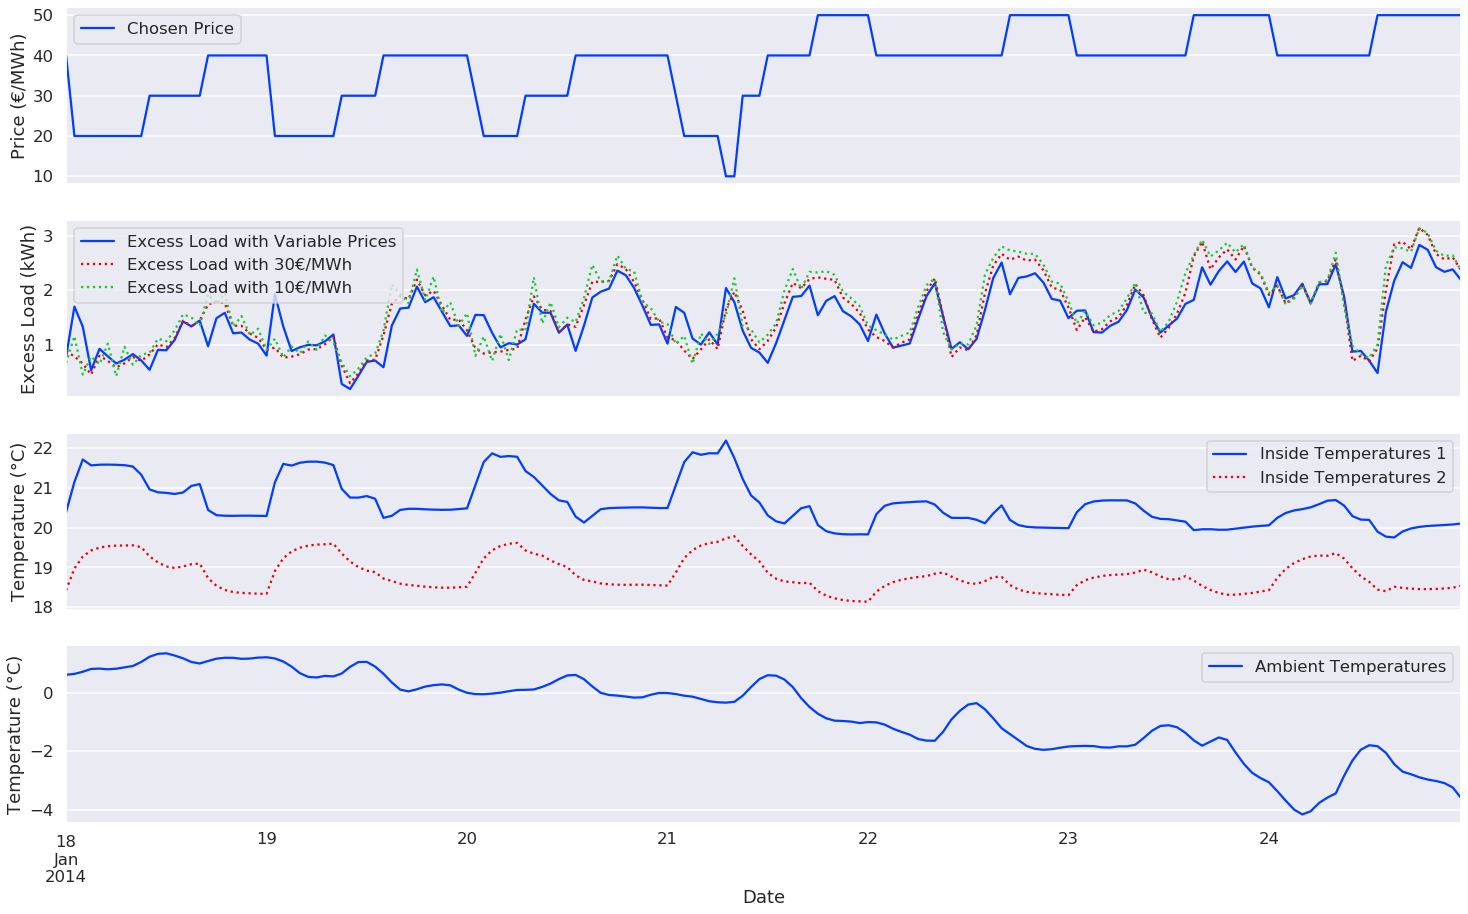

In [44]:
sns.set('talk', palette='bright')
f, ax = plt.subplots(4,1,figsize=(25,15), sharex=True)
one_week['Chosen Price'].plot(ax=ax[0], legend=True)
one_week['Deviation from load limit'].plot(ax=ax[1], legend='Test')
ax[0].set_ylabel('Price (€/MWh)')
data_base.iloc[17*24:24*24,:]['Deviation from load limit'].plot(ax=ax[1],c='r', linestyle = 'dotted')
data_base_10.iloc[17*24:24*24,:]['Deviation from load limit'].plot(ax=ax[1],c='g', linestyle = 'dotted')
ax[1].legend(["Excess Load with Variable Prices", "Excess Load with 30€/MWh", "Excess Load with 10€/MWh"])
ax[1].set_ylabel('Excess Load (kWh)')
one_week['Inside Temperatures 1'].plot(ax=ax[2])
one_week['Inside Temperatures 2'].plot(ax=ax[2], c='r', linestyle = 'dotted')
ax[2].legend(["Inside Temperatures 1", "Inside Temperatures 2"])
ax[2].set_ylabel('Temperature (°C)')
one_week['Ambient Temperatures'].plot(ax=ax[3], legend=True)
ax[3].set_ylabel('Temperature (°C)')
plt.savefig('data/output/RLBuildings/eval_jan_zoomed.png',bbox_inches='tight')

In [205]:
sum(data_base['Above'])

898.1566305275743

In [206]:
data_base['Above'].mean()

1.2055793698356705

In [207]:
data_base['Date'] = pd.date_range(start='2014-01-01',end='2014-02-11-00:00:00', periods=len(data))
data_base['Day'] = data['Date'].dt.day
data_base['Daily Excess'] = data_base.groupby('Day')['Above'].sum()

In [208]:
data_base['Daily Excess']

0            NaN
1      10.624495
2      14.518929
3       8.924391
4       5.604652
         ...    
740          NaN
741          NaN
742          NaN
743          NaN
744          NaN
Name: Daily Excess, Length: 745, dtype: float64

In [28]:
data_base['Daily Excess'].dropna()

Series([], Name: Daily Excess, dtype: float64)

In [37]:
list(base_30_excess.values)

[12.049263921970233,
 14.59189196567636,
 9.082406382138387,
 5.559985329933703,
 6.749106983266017,
 14.649753577808934,
 5.784340071182257,
 5.733452237094336,
 11.113183869342478,
 10.747889226239451,
 9.538782694424597,
 16.849158940062683,
 38.14520483148541,
 19.88568756592261,
 22.053354670047334,
 30.05542207408009,
 29.278784090620654,
 25.407324411651487,
 28.364871616727633,
 37.13017419028773,
 36.37878554994157,
 41.40424624916815,
 46.41227520604849,
 50.14977778860933,
 51.73583057429066,
 58.75717613683168,
 56.13125652588146,
 40.254540532590944,
 57.97513766321427,
 56.595997898159894,
 49.591567752875704]

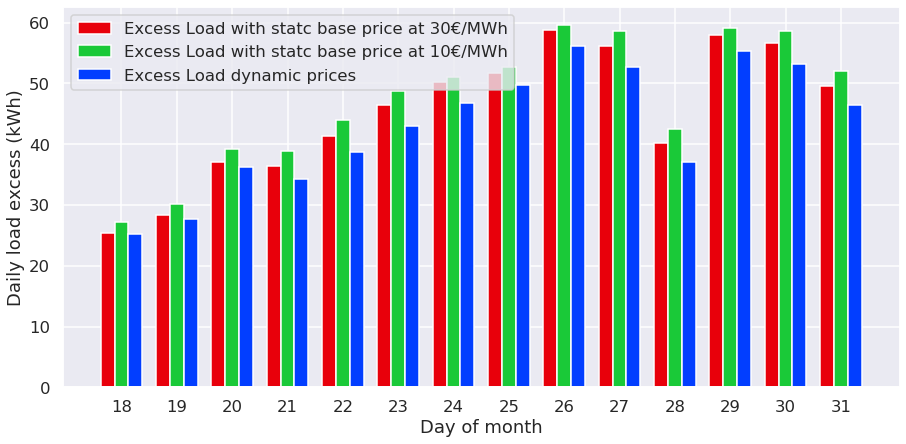

In [49]:
base_30_excess = data_base.groupby('Day')['Above'].sum().values[17:]
base_10_excess = data_base_10.groupby('Day')['Above'].sum().values[17:]
model_excess = data.groupby('Day')['Above'].sum().values[17:]

N=len(base_30_excess)
ind = np.arange(N) + 18
f, axs = plt.subplots(1,figsize=(15,7), sharey=False)
axs.bar(ind - 0.25, base_30_excess, color = 'r', width = 0.25)
axs.bar(ind ,base_10_excess , color = 'g', width = 0.25)
axs.bar(ind + 0.25,model_excess , color = 'b', width = 0.25)
axs.legend(['Excess Load with statc base price at 30€/MWh', 'Excess Load with statc base price at 10€/MWh', 'Excess Load dynamic prices'])
axs.set_ylabel('Daily load excess (kWh)')
axs.set_xlabel('Day of month')
axs.set_yticks(np.arange(0, 70, 10))
#for i, v in enumerate(cost_labels_values):
#    axs[0].text(i-0.15, 
#              v+0.2, 
#              v, 
#              fontsize=12)
axs.set_xticks(ind)
#axs.set_xticklabels(labels)
plt.savefig('data/output/RLBuildings/load_eval_jan_zoomed.png',bbox_inches='tight')

# Evaluation on November/December

In [37]:
data = pkl.load(open("data/output/RLBuildings/ScaledUp/Multi_RL_scaled_nov_dec_Zeta0.1_base_10_eval.pkl", "rb"))

data['Total Load'] = data['Total Load']*1000
data['Base Loads 1'] = data['Base Loads 1']*1000
data['Base Loads 2'] = data['Base Loads 2']*1000
data['Base Loads'] = data['Base Loads 1'] + data['Base Loads 2']
data['Deviation from load limit'] = data['Total Load'] -18
data['Date'] = pd.date_range(start='2014-11-01',end='2014-12-31-23:00:00', periods=len(data))
data['Day'] = data['Date'].dt.day

In [38]:
data['Above'] = (data['Total Load'] >= 18)*(data['Total Load']-18)
sum(data['Above'])

1235.8385857985259

In [39]:
PRICE_SET = [10,20,30,40,50,60]
def extract_price(x):
    return PRICE_SET[int(x)]
data['Chosen Price'] = data['Actions'].map(lambda x: extract_price(x))

In [40]:
data['Daily Excess'] = data.groupby('Day')['Above'].sum()

In [41]:
data_base = pkl.load(open('data/output/RLBuildings/ScaledUp/Multi_RL_scaled_nov_dec_Zeta0.1_base_10base_eval.pkl', "rb"))

In [42]:
data_base['Total Load'] = data_base['Total Load']*1000
data_base['Base Loads 1'] = data_base['Base Loads 1']*1000
data_base['Base Loads 2'] = data_base['Base Loads 2']*1000
data_base['Base Loads'] = data_base['Base Loads 1'] + data_base['Base Loads 2']
data_base['Above'] = (data_base['Total Load'] >= 18)*(data_base['Total Load']-18)
data_base['Deviation from load limit'] = data_base['Total Load']-18

In [43]:
sum(data_base['Above'])

1247.603775029206

In [46]:
one_week = data.iloc[:,:]

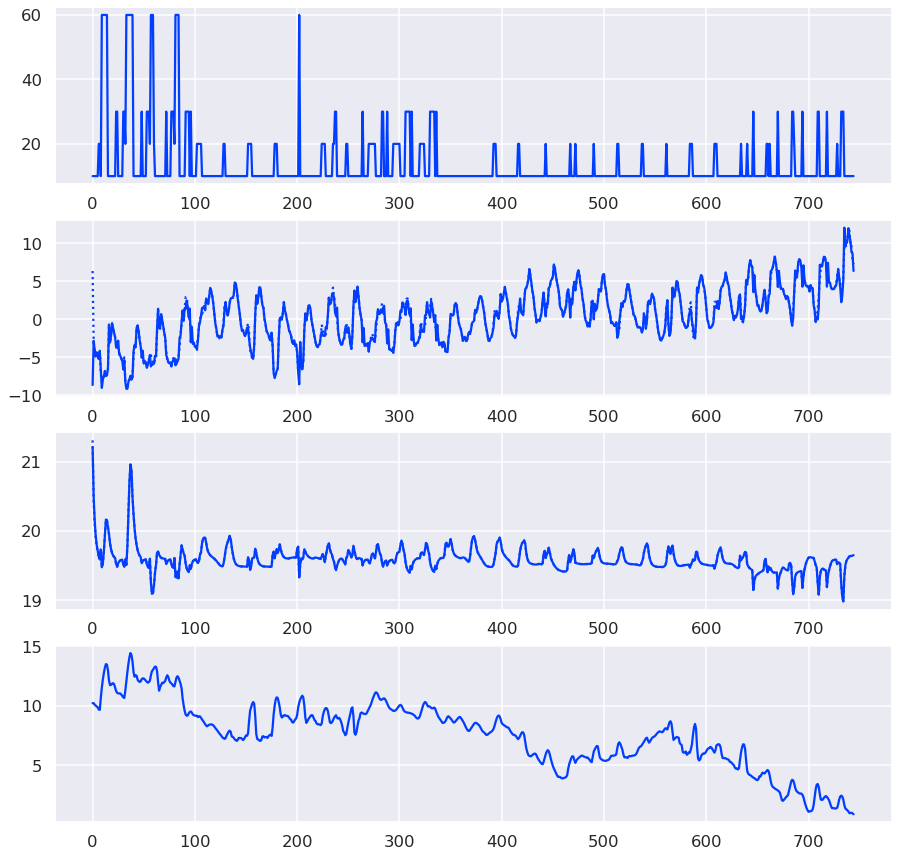

In [47]:
f, ax = plt.subplots(4,1,figsize=(15,15))
one_week['Chosen Price'].plot(ax=ax[0])
one_week['Deviation from load limit'].plot(ax=ax[1])
one_week['Double Base'] = one_week['Base Loads']*2
#one_week['Base Loads'].plot(ax=ax[1],c='g')
data_base.iloc[:,:]['Deviation from load limit'].plot(ax=ax[1],c='b', linestyle = 'dotted')
one_week['Inside Temperatures 1'].plot(ax=ax[2])
one_week['Inside Temperatures 2'].plot(ax=ax[2], c='b', linestyle = 'dotted')
one_week['Ambient Temperatures'].plot(ax=ax[3])

In [44]:
data_base['Date'] = pd.date_range(start='2014-11-01',end='2014-12-31-23:00:00', periods=len(data))
data_base['Day'] = data['Date'].dt.day
data_base['Daily Excess'] = data_base.groupby('Day')['Above'].sum()

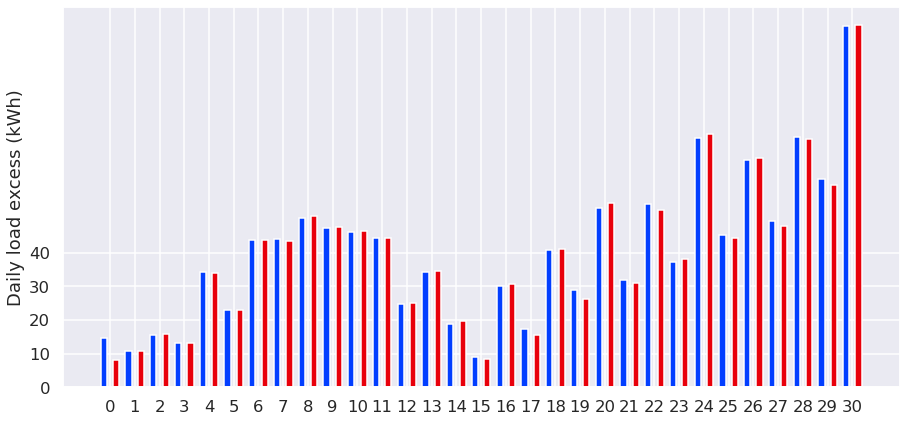

In [45]:
N=len(data_base.dropna())
ind = np.arange(N)
f, axs = plt.subplots(1,figsize=(15,7), sharey=False)
axs.bar(ind - 0.25, data_base['Daily Excess'].dropna(), color = 'b', width = 0.25, label = 'Base with static price')
axs.bar(ind + 0.25, data['Daily Excess'].dropna(), color = 'r', width = 0.25, label = 'Dynamic prices with RL')
axs.set_ylabel('Daily load excess (kWh)')
axs.set_yticks(np.arange(0, 50, 10))
#for i, v in enumerate(cost_labels_values):
#    axs[0].text(i-0.15, 
#              v+0.2, 
#              v, 
#              fontsize=12)
axs.set_xticks(ind)
#axs.set_xticklabels(labels)

# Building Scale Up

In [153]:
data = pkl.load(open('data/output/RLBuildings/ScaledUp/0408623_dynamic_True_rewards_dqn.pkl', "rb"))
data[-1]

{'NUM_EPISODES': 2000,
 'EPSILON': 1,
 'EPS_DECAY': 0.99997,
 'LEARNING_RATE_': 0.001,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 3600,
 'NUM_HOURS': 744,
 'COMFORT_PENALTY': 1,
 'LOAD_PENALTY': 100,
 'PRICE_SENSITIVITY': 200,
 'ZETA': 0.1}

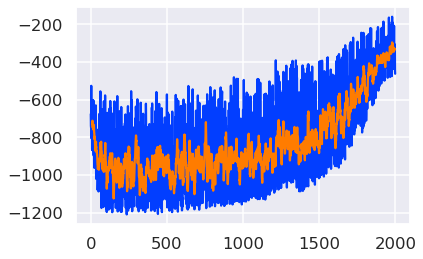

In [154]:
plt.figure()
plt.plot(data[:-1])
rewards_df = pd.DataFrame()
rewards_df['reward'] = data[:-1]
moving_avg = rewards_df[:-1].rolling(window=10).mean()
plt.plot(moving_avg)

## Evaluation on January

In [155]:
data = pkl.load(open("data/output/RLBuildings/ScaledUp/Multi_RL_scaled_jan_Zeta0.1_base_10_eval.pkl", "rb"))

data['Total Load'] = data['Total Load']*1000
data['Base Loads 1'] = data['Base Loads 1']*1000
data['Base Loads 2'] = data['Base Loads 2']*1000
data['Base Loads'] = data['Base Loads 1'] + data['Base Loads 2']
data['Deviation from load limit'] = data['Total Load'] - 18
data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01-00:00:00', periods=len(data))
data['Day'] = data['Date'].dt.day
data.index = data['Date']
data['Above'] = (data['Total Load'] >= 18)*(data['Total Load']-18)
#data['Daily Excess'] = data.groupby('Day')['Above'].sum()

In [156]:
PRICE_SET = [10,20,30,40,50,60]
def extract_price(x):
    return PRICE_SET[int(x)]
data['Chosen Price'] = data['Actions'].map(lambda x: extract_price(x))

In [157]:
data_base = pkl.load(open('data/output/RLBuildings/ScaledUp/Multi_RL_scaled_jan_Zeta0.1_base_30base_eval.pkl', "rb"))

In [158]:
data_base_10 = pkl.load(open('data/output/RLBuildings/ScaledUp/Multi_RL_scaled_jan_Zeta0.1_base_10base_eval.pkl', "rb"))

In [55]:
data_base['Total Load'] = data_base['Total Load']*1000
data_base['Base Loads 1'] = data_base['Base Loads 1']*1000
data_base['Base Loads 2'] = data_base['Base Loads 2']*1000
data_base['Base Loads'] = data_base['Base Loads 1'] + data_base['Base Loads 2']
data_base['Above'] = (data_base['Total Load'] >= 18)*(data_base['Total Load']-18)
data_base['Deviation from load limit'] = data_base['Total Load']-18
data_base['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01-00:00:00', periods=len(data))
data_base.index = data_base['Date']
data_base['Day'] = data['Date'].dt.day
data_base['Daily Excess'] = data_base.groupby('Day')['Above'].sum()

In [159]:
data_base_10['Total Load'] = data_base_10['Total Load']*1000
data_base_10['Base Loads 1'] = data_base_10['Base Loads 1']*1000
data_base_10['Base Loads 2'] = data_base_10['Base Loads 2']*1000
data_base_10['Base Loads'] = data_base_10['Base Loads 1'] + data_base_10['Base Loads 2']
data_base_10['Above'] = (data_base_10['Total Load'] >= 18)*(data_base_10['Total Load']-18)
data_base_10['Deviation from load limit'] = data_base_10['Total Load']-18
data_base_10['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01-00:00:00', periods=len(data))
data_base_10.index = data_base_10['Date']
data_base_10['Day'] = data_base_10['Date'].dt.day

In [162]:
one_week = data.iloc[:,:]

Text(0, 0.5, 'Temperature (°C)')

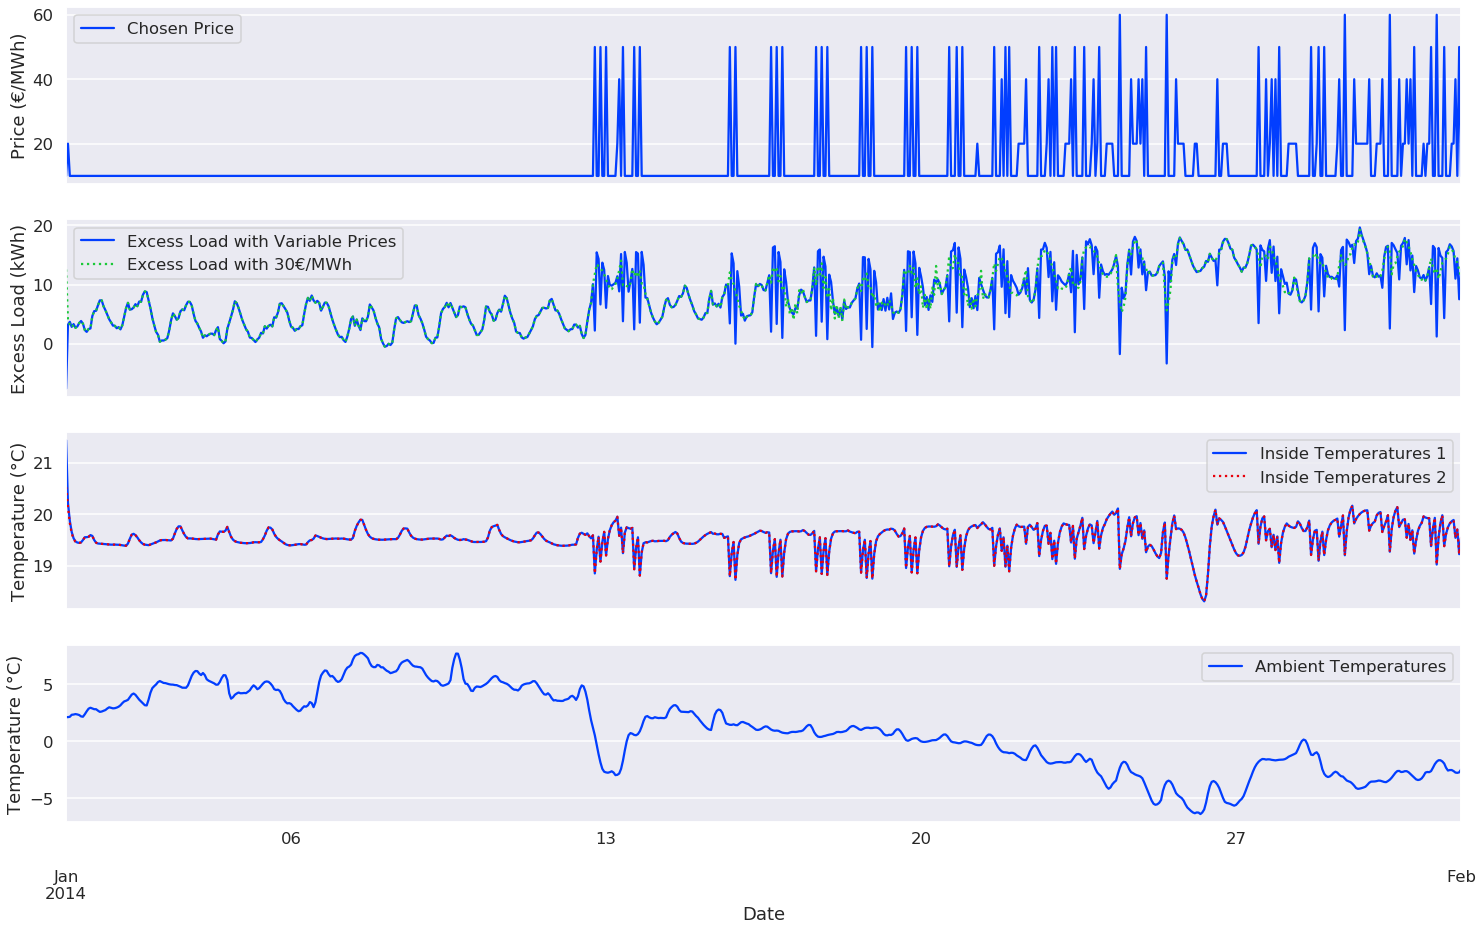

In [163]:
sns.set('talk', palette='bright')
f, ax = plt.subplots(4,1,figsize=(25,15), sharex=True)
one_week['Chosen Price'].plot(ax=ax[0], legend=True)
one_week['Deviation from load limit'].plot(ax=ax[1], legend='Test')
ax[0].set_ylabel('Price (€/MWh)')
#data_base.iloc[14*24:,:]['Deviation from load limit'].plot(ax=ax[1],c='r', linestyle = 'dotted')
data_base_10.iloc[:,:]['Deviation from load limit'].plot(ax=ax[1],c='g', linestyle = 'dotted')
ax[1].legend(["Excess Load with Variable Prices", "Excess Load with 30€/MWh"])
ax[1].set_ylabel('Excess Load (kWh)')
one_week['Inside Temperatures 1'].plot(ax=ax[2])
one_week['Inside Temperatures 2'].plot(ax=ax[2], c='r', linestyle = 'dotted')
ax[2].legend(["Inside Temperatures 1", "Inside Temperatures 2"])
ax[2].set_ylabel('Temperature (°C)')
one_week['Ambient Temperatures'].plot(ax=ax[3], legend=True)
ax[3].set_ylabel('Temperature (°C)')
#plt.savefig('data/output/RLBuildings/eval_jan_zoomed.png',bbox_inches='tight')

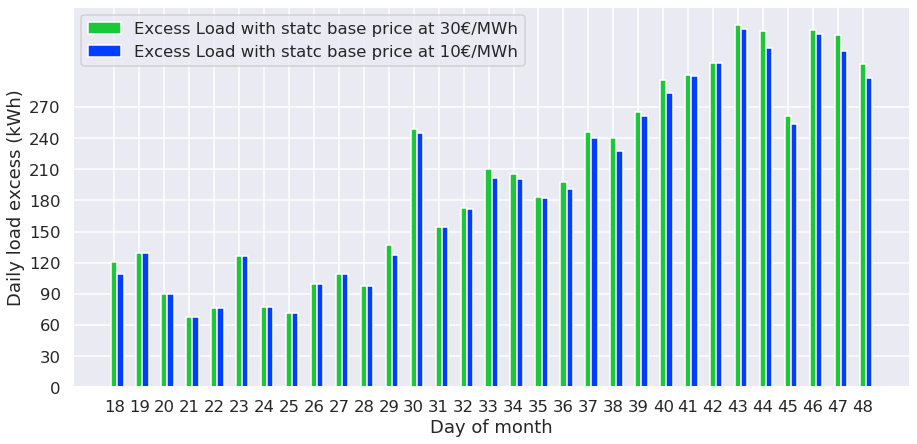

In [164]:
#base_30_excess = data_base.groupby('Day')['Above'].sum().values[:]
base_10_excess = data_base_10.groupby('Day')['Above'].sum().values[:]
model_excess = data.groupby('Day')['Above'].sum().values[:]

N=len(model_excess)
ind = np.arange(N) + 18
f, axs = plt.subplots(1,figsize=(15,7), sharey=False)
#axs.bar(ind - 0.25, base_30_excess, color = 'r', width = 0.25)
axs.bar(ind ,base_10_excess , color = 'g', width = 0.25)
axs.bar(ind + 0.25,model_excess , color = 'b', width = 0.25)
axs.legend(['Excess Load with statc base price at 30€/MWh', 'Excess Load with statc base price at 10€/MWh', 'Excess Load dynamic prices'])
axs.set_ylabel('Daily load excess (kWh)')
axs.set_xlabel('Day of month')
axs.set_yticks(np.arange(0, 300, 30))
#for i, v in enumerate(cost_labels_values):
#    axs[0].text(i-0.15, 
#              v+0.2, 
#              v, 
#              fontsize=12)
axs.set_xticks(ind)
#axs.set_xticklabels(labels)
#plt.savefig('data/output/RLBuildings/load_eval_jan_zoomed.png',bbox_inches='tight')